                                                   Restaurant Data Analysis Project

In [ ]:
#Author: Indu R
#Analyzing Restaurant Dataset

In [79]:
#Importing Libraries

import pandas as pd 
#for handling and analyzing data in tables
import seaborn as sns 
#for making easy and beautiful statistical plots.
import matplotlib.pyplot as plt
#for customizing and showing plots.

In [81]:
#load the dataset into Python to analyze, clean and visualize
df_raw = pd.read_csv("Restaurant Dataset.csv")

1.	Understanding the Database

In [84]:
#Quickly understand the structure and cleanliness of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [86]:
#Create a copy of original data
df = df_raw.copy()

In [88]:
#Preview the dataset
#Show the first 5 rows of the data
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [90]:
#Show how many missing values are in each column of the dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [92]:
#Remove rows where the 'Cuisines' column has missing values
df.dropna(subset=['Cuisines'], inplace=True)

In [94]:
#Check if its removed
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [96]:
#Count how many duplicate rows are there in the dataset
df.duplicated().sum()

0

In [98]:
#Understand the distribution and spread of your data
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [100]:
#Find unique values in key columns (helps confirm entities)

print(df['City'].unique()[:10])
print(df['Restaurant Name'].unique()[:10])
print(df['Cuisines'].unique()[:10])

['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia']
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' 'Ooma'
 'Sambo Kojin' 'Din Tai Fung' 'Buffet 101' 'Vikings'
 'Spiral - Sofitel Philippine Plaza Manila' 'Locavore']
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' 'Japanese, Sushi' 'Japanese, Korean'
 'Chinese' 'Asian, European' 'Seafood, Filipino, Asian, European'
 'European, Asian, Indian' 'Filipino']


In [102]:
#Identifying Relationships

# How many restaurants per city
print("\nTop 10 Cities by Restaurant Count:")
print(df.groupby("City")["Restaurant Name"].nunique().sort_values(ascending=False).head(10))

# How many cuisines per restaurant (split cuisines if needed)
df["Cuisine Count"] = df["Cuisines"].apply(lambda x: len(str(x).split(",")))
print("\nAverage Cuisine Count per Restaurant:")
print(df.groupby("Restaurant Name")["Cuisine Count"].mean().head())

# Average rating per city
print("\nTop 10 Cities by Average Rating:")
print(df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10))


Top 10 Cities by Restaurant Count:
City
New Delhi       4295
Gurgaon          943
Noida            902
Faridabad        235
Ghaziabad         25
Amritsar          21
Ahmedabad         21
Guwahati          21
Bhubaneshwar      21
Lucknow           21
Name: Restaurant Name, dtype: int64

Average Cuisine Count per Restaurant:
Restaurant Name
#45             1.0
#Dilliwaala6    1.0
#InstaFreeze    1.0
#OFF Campus     4.0
#Urban Caf��    3.0
Name: Cuisine Count, dtype: float64

Top 10 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64


In [104]:
#Found non-ASCII characters in above cells. Let's remove them

def remove_special_chars(text):
    if isinstance(text, str):
        return text.encode('ascii', 'ignore').decode('ascii')
    return text

# Apply only to object (string) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].map(remove_special_chars)

In [106]:
# Check for any non-ASCII characters left
df.apply(lambda col: col.str.contains(r'[^\x00-\x7F]', na=False).any() if col.dtype == 'object' else False)

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
Cuisine Count           False
dtype: bool

In [108]:
#Quick check to see if the special characters are removed

print(df['City'].unique()[:10])
print(df['Restaurant Name'].unique()[:10])
print(df['Cuisines'].unique()[:10])

['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras_lia']
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' 'Ooma'
 'Sambo Kojin' 'Din Tai Fung' 'Buffet 101' 'Vikings'
 'Spiral - Sofitel Philippine Plaza Manila' 'Locavore']
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' 'Japanese, Sushi' 'Japanese, Korean'
 'Chinese' 'Asian, European' 'Seafood, Filipino, Asian, European'
 'European, Asian, Indian' 'Filipino']


In [110]:
#Creating a mini data dictionary manually
data_dict = {
    'Restaurant Name': 'Name of the restaurant',
    'City': 'City where the restaurant is located',
    'Cuisines': 'Types of cuisines offered',
    'Average Cost for two': 'Cost in local currency for a meal for two',
    'Aggregate rating': 'Customer rating out of 5',
    'Votes': 'Number of user votes'
}

In [112]:
#No need to rename any columns as these are understandable

#Let's scan metadata columns like “Currency” and “Rating Text”
print(df['Currency'].unique())
print(df['Rating text'].unique())

['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)' 'Pounds()'
 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)' 'Turkish Lira(TL)']
['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


2. Building Cognitive Model for Analysis


Let's define the purpose of our analysis and the questions we want to answer.

 1.  Examine how restaurants are spread across rating levels, price ranges, and vote counts.
 2.  Analyze availability of services like online delivery and table booking.
 3.  Identify high-cost outliers top 1% and top 5% by votes.
 4.  Detect outliers in ratings and votes using boxplots and IQR.
 5.  Find restaurants with the highest and lowest costs.
 6.  Assess correlations between cost, ratings, and votes.
 7.  How ratings relate to color coding and rating text?
 8.  Visualize votes vs. average cost to detect patterns.
 9.  Discover top cuisines and those linked with poor ratings.
 10. Rank cities by highest and lowest average ratings.
 11. Analyze average cost and rating grouped by city or restaurant.
 12. Compare performance of restaurants with vs. without delivery/table booking.
 13. Identify the restaurant with the most customer votes.

In [116]:
#Identifying KPI's and Dimensions

kpis = ['Aggregate rating', 'Average Cost for two', 'Votes']
dimensions = ['City', 'Cuisines', 'Price range', 'Rating text', 'Has Online delivery', 'Has Table booking', 'Currency']

Conceptual View – What we are looking at and why

We’re diving into restaurant data from multiple cities, trying to understand what makes some places stand out while others fall behind. The goal is to use this information to help restaurant managers or decision-makers take smarter actions.

The data includes things like:
1. How much a meal costs for two people?
2. How customers rate their experience?
3. How many people voted or left feedback?
4. Whether the restaurant offers delivery or table booking?
5. And of course, the type of food they serve

We’ll be focusing on a few key metrics:
1. Ratings to see how well customers like a place
2. Votes to track popularity
3. Cost for Two to understand pricing and market positioning

But we’re not just looking at these numbers in isolation. We’ll break them down by:
1. City (to see if location matters)
2. Cuisine (what’s working and what’s not)
3. Price range
4. Whether they offer delivery or allow table bookings

This helps us answer questions like:
1. Which cities or cuisines are doing better than others?
2. Are higher-priced restaurants actually better rated?
3. Do restaurants that provide delivery tend to get higher or lower ratings than those that don’t?
4. Is there a connection between having a structured experience (like table booking) and better feedback?

In short, this analysis gives us a clearer picture of what drives success in the restaurant space and where there’s room to grow.


3.	Building Logical and Physical Model of Analysis Data

In [120]:
#Let's identify Fact and Dimension Columns and then sketch a Star Schema

#FACT Columns (measurable values):
fact_columns = ['Restaurant Name', 'Votes', 'Aggregate rating', 'Average Cost for two']

#DIMENSION Columns (categorical info):
dimension_columns = ['City', 'Cuisines', 'Price range', 'Currency', 'Has Table booking', 'Has Online delivery']

#Let's define a physical model for implementation — what tables, fields, and joins we will use for preparing your analysis dataset

Tables Used:

Table Name	       Type	          Description
restaurant_data	 Fact Table	 Contains numerical metrics and keys: ratings, votes, average cost, city_id, cuisine_id, etc.
dim_city	     Dimension	 City-related information (City_ID, City_Name, Country)
dim_cuisine	     Dimension	 Cuisine types (Cuisine_ID, Cuisine_Name)
dim_currency	 Dimension	 Currency conversion details (Currency, Conversion_to_INR)


Fields from Each Table:

restaurant_data: Restaurant_ID, City_ID, Cuisine_ID, Average Cost for two, Aggregate rating, Votes, Currency, Has Online delivery

dim_city: City_ID, City_Name, Country_Name

dim_cuisine: Cuisine_ID, Cuisine_Name

dim_currency: Currency, Conversion_to_INR

In [124]:
#Joins Used 

# Step 1: Create ID columns
df['City_ID'] = df['City'].astype('category').cat.codes
df['Cuisine_ID'] = df['Cuisines'].astype('category').cat.codes
df['Currency_ID'] = df['Currency'].astype('category').cat.codes

# Step 2: Create dimension tables
dim_city = df[['City_ID', 'City']].drop_duplicates()
dim_cuisine = df[['Cuisine_ID', 'Cuisines']].drop_duplicates()
dim_currency = df[['Currency_ID', 'Currency']].drop_duplicates()

# Step 3: Add conversion rates
conversion_rates = {
    'indian rupees(inr)': 1.0,
    'dollar($)': 83,
    'pounds(£)': 103,
    'emirati diram(aed)': 22,
    'brazilian real(r$)': 17,
    'indonesian rupiah(idr)': 0.0053,
    'botswana pula(p)': 6.3
}
dim_currency['Conversion_to_INR'] = dim_currency['Currency'].map(conversion_rates)

# Step 4: Merge currency info into main df

#Drop existing Conversion_to_INR to avoid merge conflict
if 'Conversion_to_INR' in df.columns:
    df = df.drop(columns=['Conversion_to_INR'])

# Now safely merge
df = df.merge(dim_currency[['Currency', 'Conversion_to_INR']], on='Currency', how='left')

# Step 5: Calculate cost in INR
df['Cost_INR'] = df['Average Cost for two'] * df['Conversion_to_INR']

# Step 6: Final output
print(df[['City', 'Cuisines', 'Currency', 'Average Cost for two', 'Conversion_to_INR', 'Cost_INR']].head(10))


               City                            Cuisines          Currency  \
0       Makati City          French, Japanese, Desserts  Botswana Pula(P)   
1       Makati City                            Japanese  Botswana Pula(P)   
2  Mandaluyong City    Seafood, Asian, Filipino, Indian  Botswana Pula(P)   
3  Mandaluyong City                     Japanese, Sushi  Botswana Pula(P)   
4  Mandaluyong City                    Japanese, Korean  Botswana Pula(P)   
5  Mandaluyong City                             Chinese  Botswana Pula(P)   
6        Pasay City                     Asian, European  Botswana Pula(P)   
7        Pasay City  Seafood, Filipino, Asian, European  Botswana Pula(P)   
8        Pasay City             European, Asian, Indian  Botswana Pula(P)   
9        Pasig City                            Filipino  Botswana Pula(P)   

   Average Cost for two  Conversion_to_INR  Cost_INR  
0                  1100                NaN       NaN  
1                  1200                NaN

In [126]:
#Let's fix the NaN values of Conversion_to_INR and Cost_INR to real values

#The issue was with the lower and upper case of Currency name

# Step 1: Create ID columns
df['City_ID'] = df['City'].astype('category').cat.codes
df['Cuisine_ID'] = df['Cuisines'].astype('category').cat.codes
df['Currency_ID'] = df['Currency'].astype('category').cat.codes

# Step 2: Create dimension tables
dim_city = df[['City_ID', 'City']].drop_duplicates()
dim_cuisine = df[['Cuisine_ID', 'Cuisines']].drop_duplicates()
dim_currency = df[['Currency_ID', 'Currency']].drop_duplicates()

# Step 3: Add conversion rates
conversion_rates = {
    'Indian Rupees(Rs.)': 1.0,
    'Dollar($)': 83,
    'Pounds()': 103,
    'Emirati Diram(AED)': 22,
    'Brazilian Real(R$)': 17,
    'Indonesian Rupiah(IDR)': 0.0053,
    'Botswana Pula(P)': 6.3,
    'NewZealand($)': 50,        # Add approximate values if needed
    'Qatari Rial(QR)': 22,
    'Rand(R)': 4.5,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.6
}
dim_currency['Conversion_to_INR'] = dim_currency['Currency'].map(conversion_rates)

#Drop existing Conversion_to_INR if it exists
if 'Conversion_to_INR' in df.columns:
    df = df.drop(columns=['Conversion_to_INR'])

# Step 4: Merge currency info into main df
df = df.merge(dim_currency[['Currency', 'Conversion_to_INR']], on='Currency', how='left')

# Step 5: Calculate cost in INR
df['Cost_INR'] = df['Average Cost for two'] * df['Conversion_to_INR']

# Step 6: Final output
print(df[['City', 'Cuisines', 'Currency', 'Average Cost for two', 'Conversion_to_INR', 'Cost_INR']].head(10))


               City                            Cuisines          Currency  \
0       Makati City          French, Japanese, Desserts  Botswana Pula(P)   
1       Makati City                            Japanese  Botswana Pula(P)   
2  Mandaluyong City    Seafood, Asian, Filipino, Indian  Botswana Pula(P)   
3  Mandaluyong City                     Japanese, Sushi  Botswana Pula(P)   
4  Mandaluyong City                    Japanese, Korean  Botswana Pula(P)   
5  Mandaluyong City                             Chinese  Botswana Pula(P)   
6        Pasay City                     Asian, European  Botswana Pula(P)   
7        Pasay City  Seafood, Filipino, Asian, European  Botswana Pula(P)   
8        Pasay City             European, Asian, Indian  Botswana Pula(P)   
9        Pasig City                            Filipino  Botswana Pula(P)   

   Average Cost for two  Conversion_to_INR  Cost_INR  
0                  1100                6.3    6930.0  
1                  1200                6.3

In [132]:
#Let's check the updated column names
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine Count', 'City_ID', 'Cuisine_ID', 'Currency_ID',
       'Cost_INR', 'Conversion_to_INR'],
      dtype='object')


4.	Preparing the Analysis Data

In [139]:
#Drop unnecessary columns and show the first 10 rows of the remaining data

df = df.drop(columns=['Restaurant ID' , 'Country Code', 'Address' , 'Locality' , 'Locality Verbose' , 'Longitude' , 'Latitude' , 'Is delivering now' ,'Switch to order menu'])
print(df.head(10))

                            Restaurant Name              City  \
0                          Le Petit Souffle       Makati City   
1                          Izakaya Kikufuji       Makati City   
2                    Heat - Edsa Shangri-La  Mandaluyong City   
3                                      Ooma  Mandaluyong City   
4                               Sambo Kojin  Mandaluyong City   
5                              Din Tai Fung  Mandaluyong City   
6                                Buffet 101        Pasay City   
7                                   Vikings        Pasay City   
8  Spiral - Sofitel Philippine Plaza Manila        Pasay City   
9                                  Locavore        Pasig City   

                             Cuisines  Average Cost for two          Currency  \
0          French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                            Japanese                  1200  Botswana Pula(P)   
2    Seafood, Asian, Filipino, Indian    

In [141]:
#Let's create aggregate views 
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
avg_rating_city.head(10)

,City,Aggregate rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.552941
4,Allahabad,3.395000
5,Amritsar,3.685714
6,Ankara,4.305000
7,Armidale,3.500000
8,Athens,4.200000
9,Auckland,4.275000


5.	Analyse the Data

DISTRIBUTION ANALYSIS

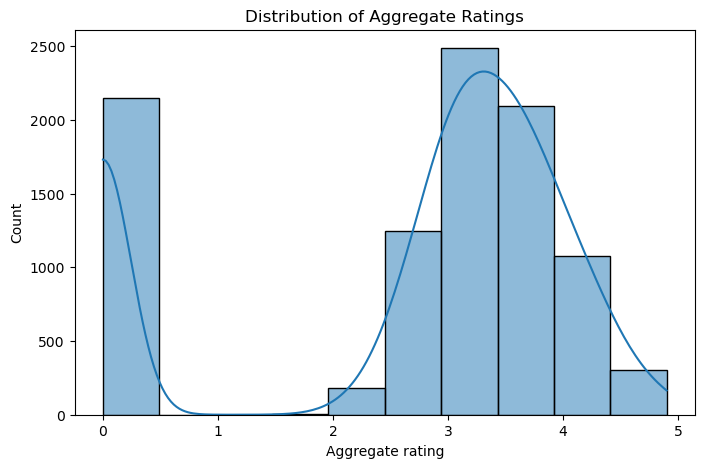

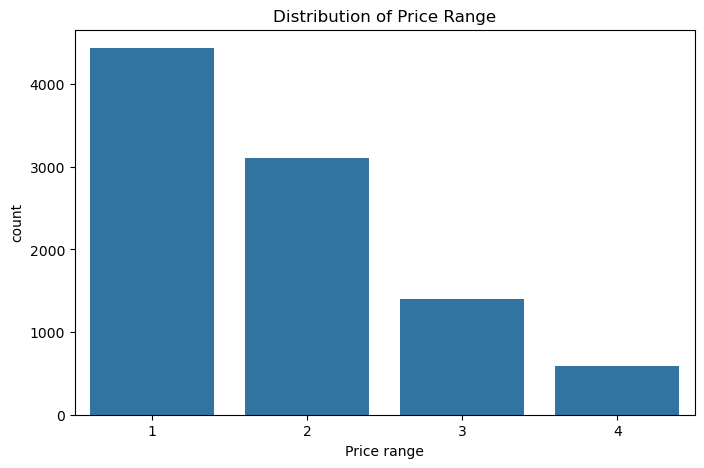

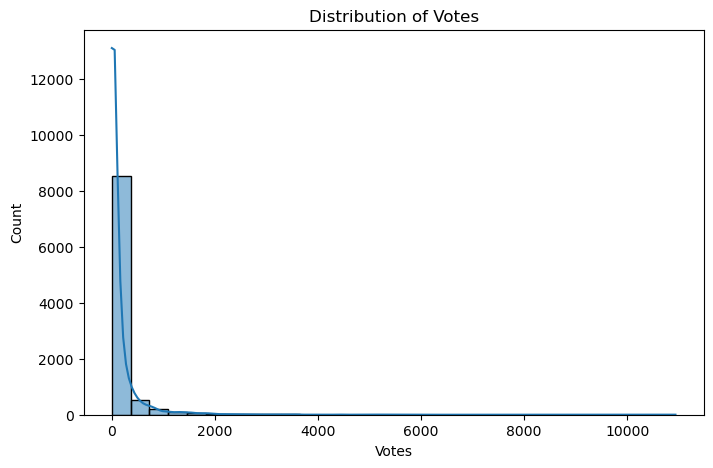

In [145]:
#Let’s examine the distribution of numerical and categorical columns (like ratings, price range, votes, etc.)

# Distribution of aggregate ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.show()

# Distribution of Price range
plt.figure(figsize=(8,5))
sns.countplot(x='Price range', data=df)
plt.title('Distribution of Price Range')
plt.show()

# Distribution of Votes
plt.figure(figsize=(8,5))
sns.histplot(df['Votes'], bins=30, kde=True)
plt.title('Distribution of Votes')
plt.show()

SUMMARY:

Distribution of Aggregate Ratings
1. Skewness - Slightly Left Skew
2. Normality - Not normal
3. Bimodal Pattern - Yes

Distribution of Price Range
1. Skewness - Right Skew
2. Normality - Not normal
3. Bimodal Pattern - No (Unimodal)

Distribution of Votes
1. Skewness - Highly Right Skew
2. Normality - Not normal
3. Bimodal Pattern - No (Unimodal)

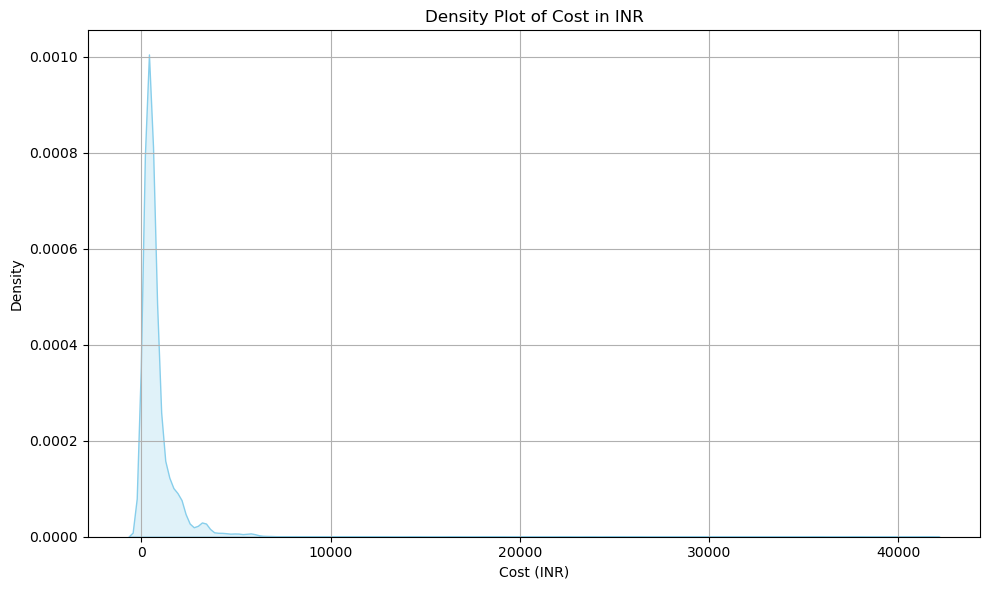

In [148]:

# Set figure size
plt.figure(figsize=(10, 6))

# Plot KDE
sns.kdeplot(data=df, x='Cost_INR', fill=True, color='skyblue')

# Customize plot
plt.title('Density Plot of Cost in INR')
plt.xlabel('Cost (INR)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


SUMMARY:

Density Plot of Cost in INR
1. Skewness - Highly Right Skew
2. Normality - Not normal
3. Bimodal Pattern - No (Unimodal)

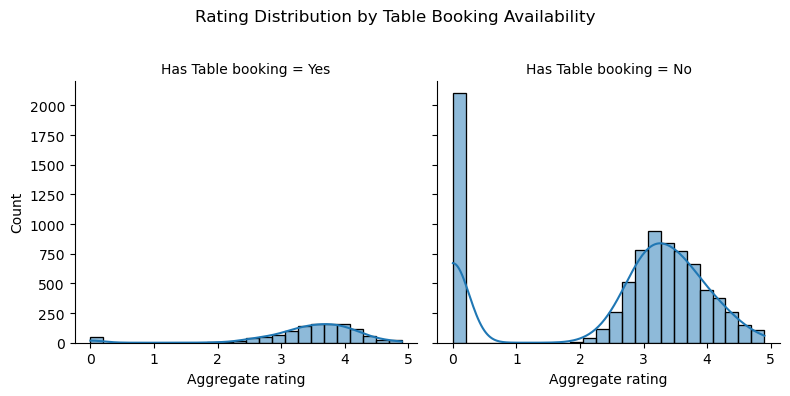

In [151]:
g = sns.FacetGrid(df, col="Has Table booking", height=4)
g.map_dataframe(sns.histplot, x="Aggregate rating", binwidth=0.2, kde=True)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Rating Distribution by Table Booking Availability")
plt.show()

SUMMARY:

Rating Distribution by Table Booking Availability

(Table Booking = Yes)
1. Skewness - Slight Right Skew
2. Normality - Nearly normal
3. Bimodal Pattern - No (Unimodal)

(Table Booking = No)
1. Skewness - Highly Right Skew
2. Normality - Not normal
3. Bimodal Pattern - Slight hint of Bimodal

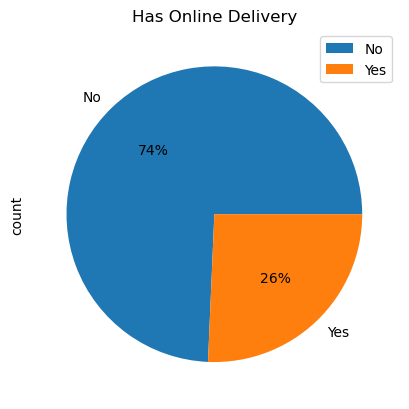

In [154]:
#Create a pie chart showing the distribution of online delivery availability (Yes or No) in your dataset

df["Has Online delivery"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Has Online Delivery")
plt.legend()
plt.show()

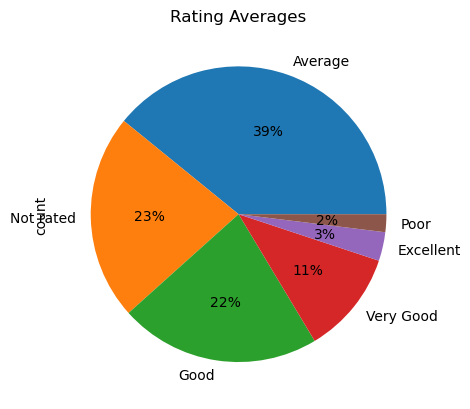

In [156]:
#Create a pie chart showing the distribution of different rating categories (e.g., "Excellent", "Good") based on the "Rating text" column in your dataset

df["Rating text"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Rating Averages")
plt.show()

OUTLIER ANALYSIS

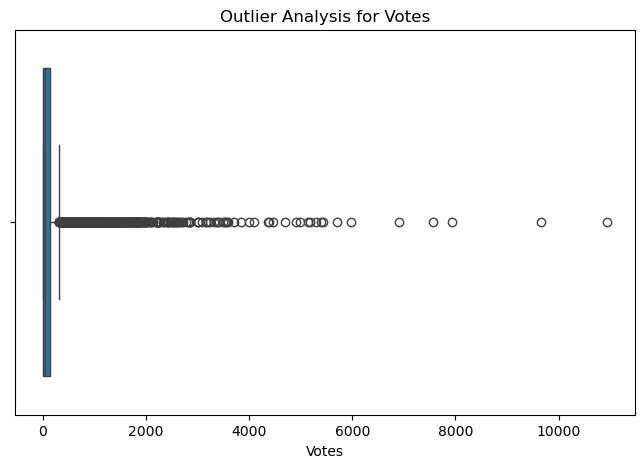

Number of outliers in 'Votes': 1131


In [159]:
#We will use boxplots and IQR method to find outliers.

# Boxplot for Votes
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Votes'])
plt.title('Outlier Analysis for Votes')
plt.show()

# Detect outliers using IQR
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Votes'] < Q1 - 1.5 * IQR) | (df['Votes'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'Votes': {outliers.shape[0]}")


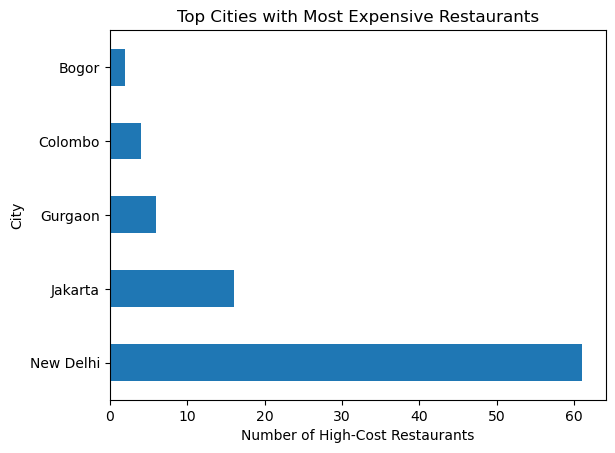

In [161]:
# Restaurants in the top 1% of cost
high_cost_threshold = df['Average Cost for two'].quantile(0.99)
high_cost_restaurants = df[df['Average Cost for two'] >= high_cost_threshold]

# Top cities with high-cost restaurants
top_cities = high_cost_restaurants['City'].value_counts().head(5)
top_cities.plot(kind='barh', title='Top Cities with Most Expensive Restaurants')
plt.xlabel("Number of High-Cost Restaurants")
plt.show()


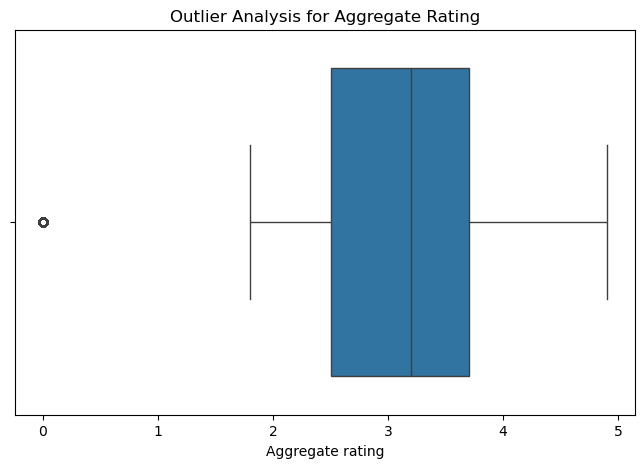

Number of outliers in 'Aggregate rating': 2148


In [163]:
#Detect and visualize outliers in the 'Aggregate rating' column using both a boxplot and the IQR method.

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Aggregate rating'])
plt.title("Outlier Analysis for Aggregate Rating")
plt.show()

# IQR method
Q1_rating = df['Aggregate rating'].quantile(0.25)
Q3_rating = df['Aggregate rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

outliers_rating = df[(df['Aggregate rating'] < Q1_rating - 1.5 * IQR_rating) |
                     (df['Aggregate rating'] > Q3_rating + 1.5 * IQR_rating)]

print(f"Number of outliers in 'Aggregate rating': {outliers_rating.shape[0]}")

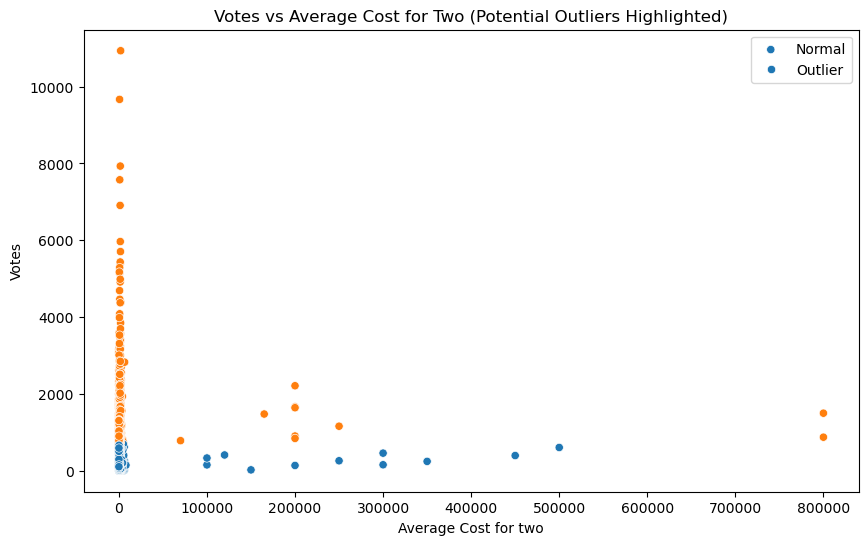

In [165]:
#Create a scatter plot of Votes vs. Average Cost for Two, highlighting potential outliers (top 5% of votes).

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Average Cost for two', y='Votes', hue=df['Votes'] > df['Votes'].quantile(0.95))
plt.title('Votes vs Average Cost for Two (Potential Outliers Highlighted)')
plt.legend(['Normal', 'Outlier'])
plt.show()


Significance and Potential causes

What we found?
1. We noticed quite a few restaurants stand out from the rest — over 1100 have unusually high or low vote counts, and around 2100 show extreme ratings (either very good or very poor). These are the outliers in our data.
2. Why does that matter? Well, these outliers can skew our averages. They often point to very popular restaurants, or in some cases, those with negative buzz. Sometimes, it's not even real customers — fake reviews or data errors can also be the cause.
3. We also discovered that New Delhi has the most high-cost restaurants in our entire dataset. This tells us something important: New Delhi is likely a hotspot for upscale dining. 
The city probably attracts wealthier customers, tourists, or business travelers looking for a premium food experience.

What this means?
1. Those outliers are valuable insights — not mistakes. They tell us where people are most engaged, whether good or bad.
2. If you're a business or investor, cities like New Delhi could be ideal for launching or expanding premium restaurants.
3. Understanding where votes and ratings spike helps build better marketing strategies, target the right audience, and spot trends early.


RELATION ANALYSIS

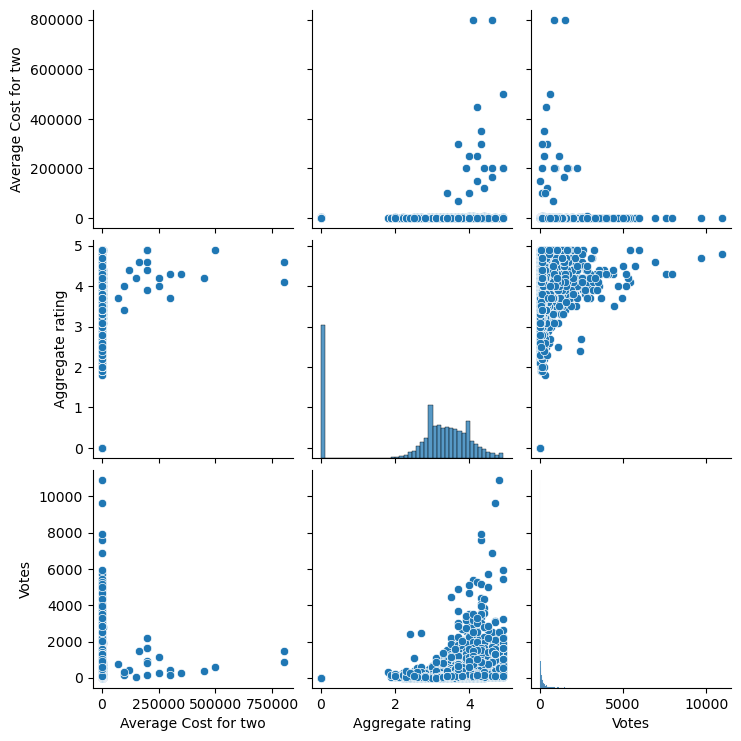

In [169]:
#Check correlations between numerical features and relationships using scatterplots.

sns.pairplot(df[["Average Cost for two","Aggregate rating","Votes"]])

SUMMARY:

Strong correlation: Votes and Aggregate Rating

Weak correlation: Votes and Average cost for two, Aggregate Rating and Average cost for two

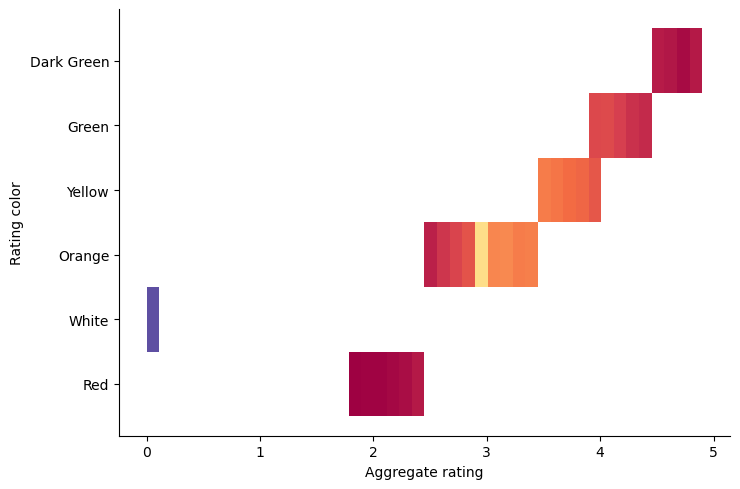

In [172]:
#Create a distribution plot of 'Aggregate rating' vs. 'Rating color' with a color gradient and a wider aspect ratio.

sns.displot(df,x='Aggregate rating', y = 'Rating color', cmap='Spectral', aspect=1.5)

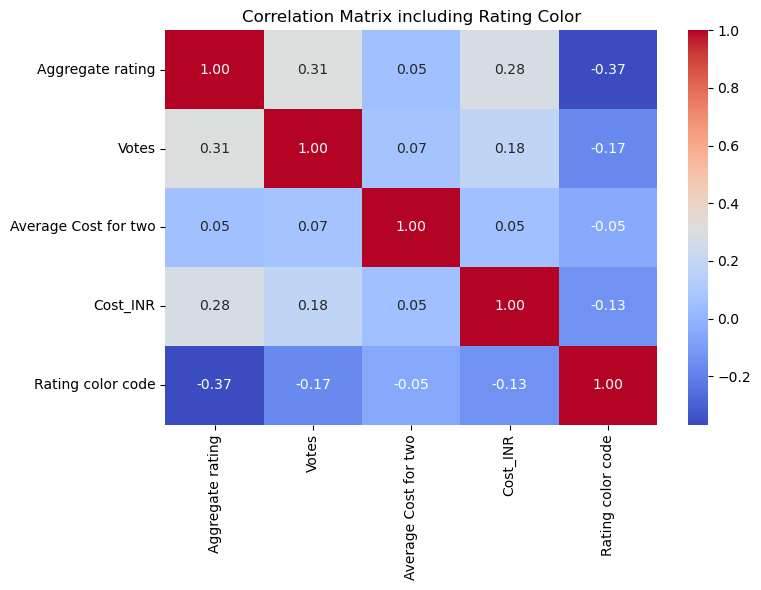

In [174]:
# Convert Rating color to numeric codes
df['Rating color code'] = df['Rating color'].astype('category').cat.codes

# Pick numeric columns for correlation
corr_cols = ['Aggregate rating', 'Votes', 'Average Cost for two', 'Cost_INR', 'Rating color code']

# Calculate correlation
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix including Rating Color')
plt.tight_layout()
plt.show()


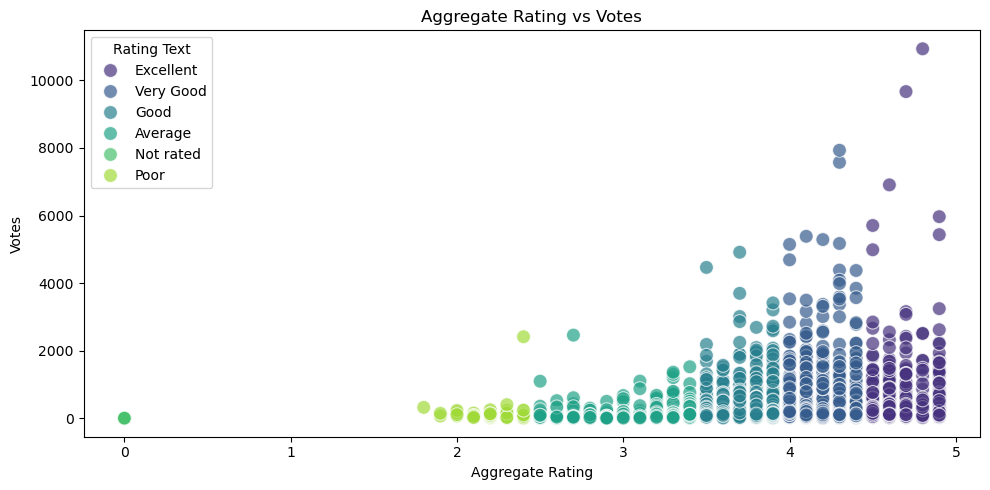

In [176]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', hue='Rating text', palette='viridis', s=100, alpha=0.7)
plt.title('Aggregate Rating vs Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.legend(title='Rating Text')
plt.tight_layout()
plt.show()


TREND ANALYSIS

Top 10 Cuisines:


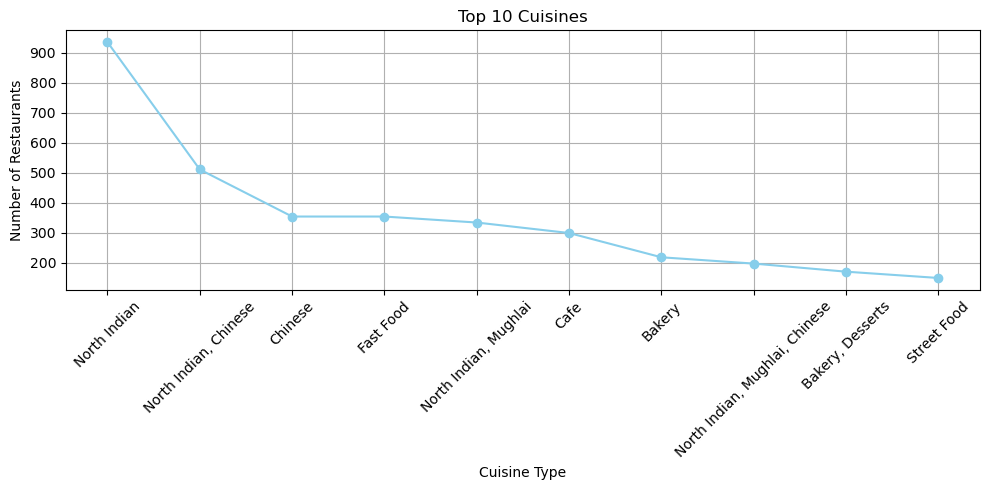

Top 10 Cities by Average Rating:


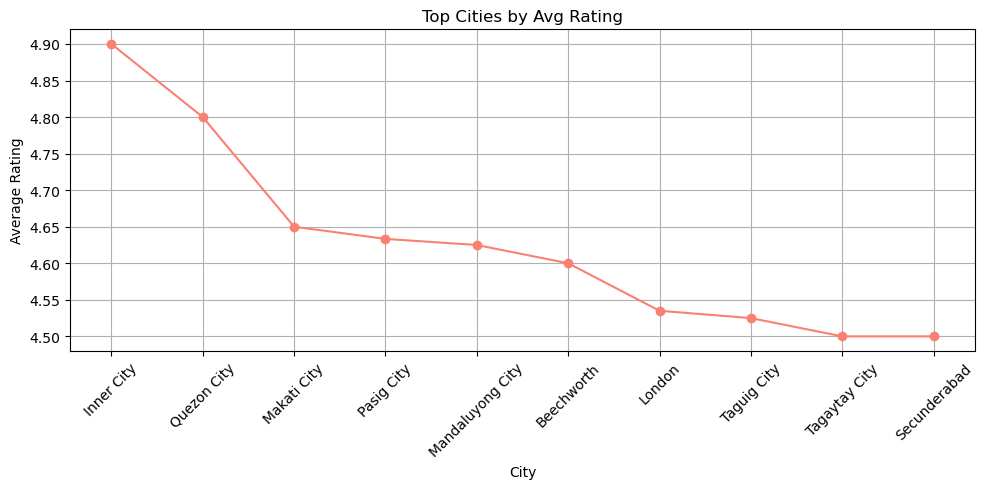

In [179]:
#Trends like which cuisine is more popular, which city has more high-rated restaurants, etc.

# --- Top 10 Cuisines ---
print("Top 10 Cuisines:")
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines = top_cuisines.sort_values(ascending=False)  # Optional, to keep consistent order

top_cuisines.plot.line(marker='o', title='Top 10 Cuisines', figsize=(10, 5), color='skyblue')
plt.ylabel("Number of Restaurants")
plt.xlabel("Cuisine Type")
plt.xticks(ticks=range(len(top_cuisines)), labels=top_cuisines.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Top 10 Cities by Average Rating ---
print("Top 10 Cities by Average Rating:")
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
city_rating = city_rating.sort_values(ascending=False)

city_rating.plot.line(marker='o', title='Top Cities by Avg Rating', figsize=(10, 5), color='salmon')
plt.ylabel("Average Rating")
plt.xlabel("City")
plt.xticks(ticks=range(len(city_rating)), labels=city_rating.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

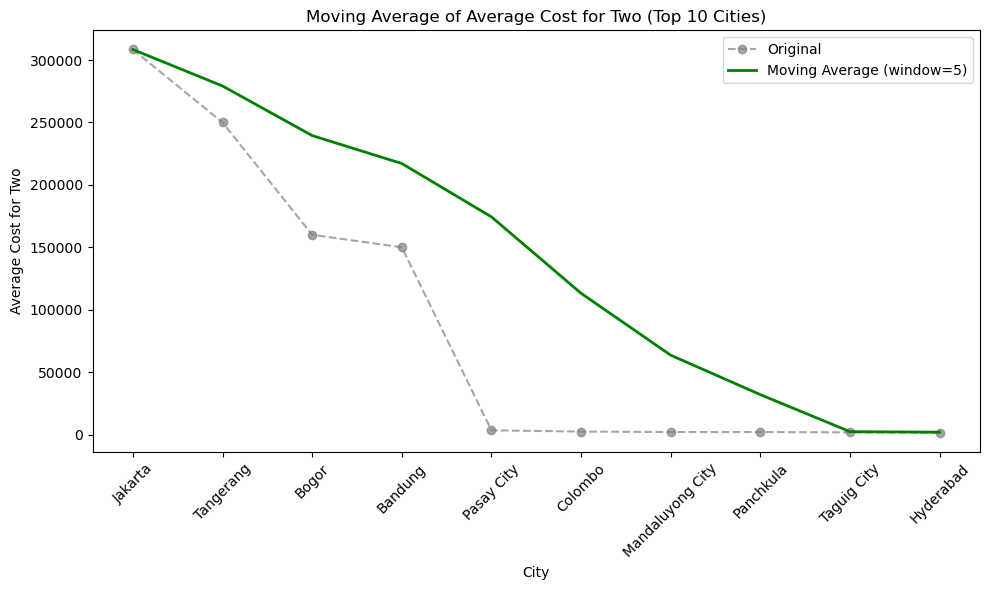

In [181]:
# Calculate mean average cost per city
avg_cost_city = df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False)

# Keep only the top 10 cities
avg_cost_top10 = avg_cost_city.head(10)

# Compute moving average (window = 5)
moving_avg_top10 = avg_cost_top10.rolling(window=5, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_cost_top10.index, avg_cost_top10.values, label='Original', color='gray', linestyle='--', marker='o', alpha=0.7)
plt.plot(avg_cost_top10.index, moving_avg_top10.values, label='Moving Average (window=5)', color='green', linewidth=2)

plt.title("Moving Average of Average Cost for Two (Top 10 Cities)")
plt.xlabel("City")
plt.ylabel("Average Cost for Two")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


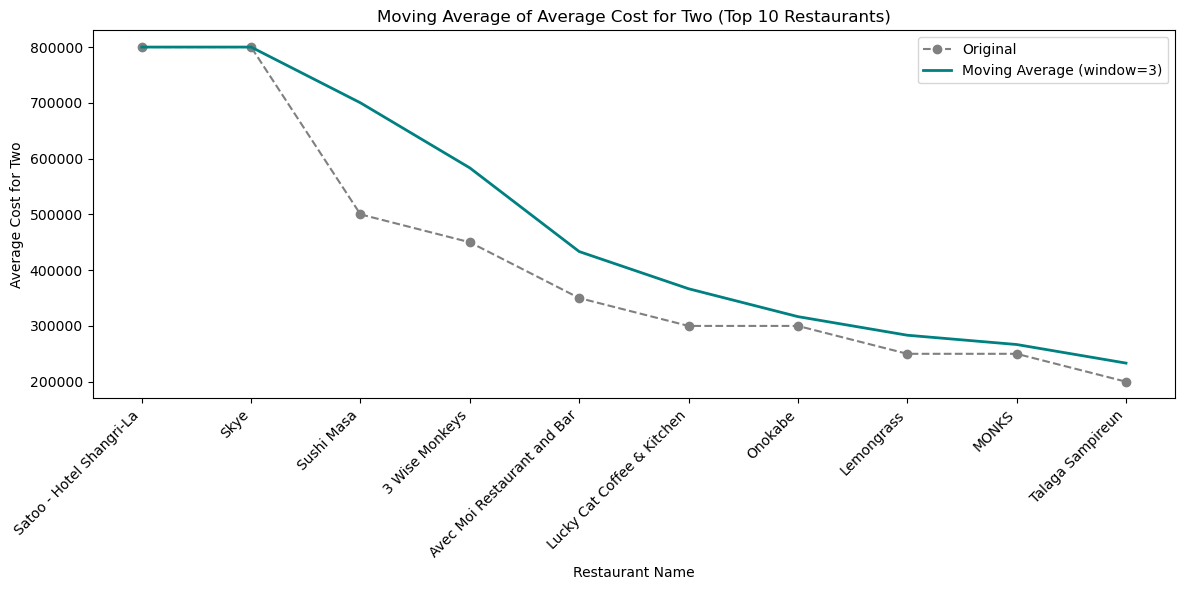

In [183]:
# Step 1: Group and sort average cost per restaurant
avg_cost_restaurant = df.groupby("Restaurant Name")["Average Cost for two"].mean().sort_values(ascending=False).head(10)

# Step 2: Compute moving average with a window of 3 (or adjust as needed)
moving_avg = avg_cost_restaurant.rolling(window=3, min_periods=1).mean()

# Step 3: Plot original and moving average
plt.figure(figsize=(12, 6))
plt.plot(avg_cost_restaurant.index, avg_cost_restaurant.values, label='Original', linestyle='--', marker='o', color='gray')
plt.plot(avg_cost_restaurant.index, moving_avg.values, label='Moving Average (window=3)', color='teal', linewidth=2)

plt.title("Moving Average of Average Cost for Two (Top 10 Restaurants)")
plt.xlabel("Restaurant Name")
plt.ylabel("Average Cost for Two")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


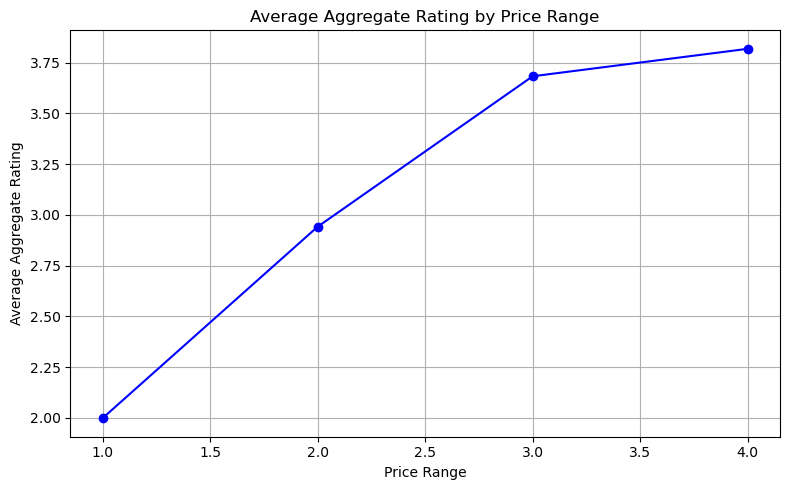

In [185]:
# Step 1: Calculate the average rating for each price range
avg_rating_by_price = df.groupby("Price range")["Aggregate rating"].mean().sort_index()

# Step 2: Plot as a line chart
plt.figure(figsize=(8, 5))
plt.plot(avg_rating_by_price.index, avg_rating_by_price.values, marker='o', linestyle='-', color='blue')

plt.title("Average Aggregate Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Aggregate Rating")
plt.grid(True)
plt.tight_layout()
plt.show()



COMPARATIVE ANALYSIS

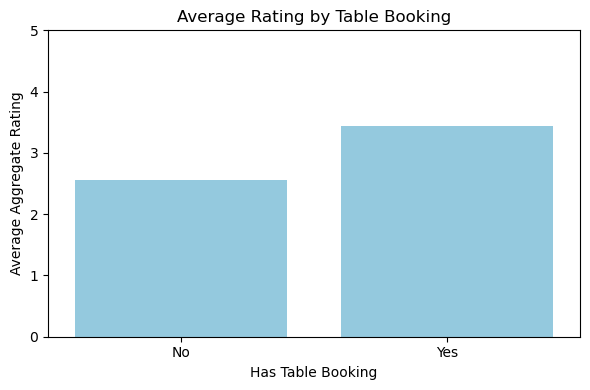

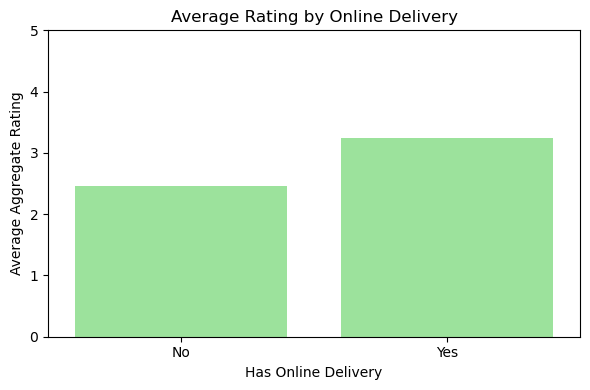

In [188]:
# Prepare DataFrames for plotting
avg_rating_table_df = df.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()
avg_rating_online_df = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()

# Bar chart: Average rating by Table Booking
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_rating_table_df, x='Has Table booking', y='Aggregate rating', color='skyblue')
plt.title('Average Rating by Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# Bar chart: Average rating by Online Delivery
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_rating_online_df, x='Has Online delivery', y='Aggregate rating', color='lightgreen')
plt.title('Average Rating by Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Aggregate Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


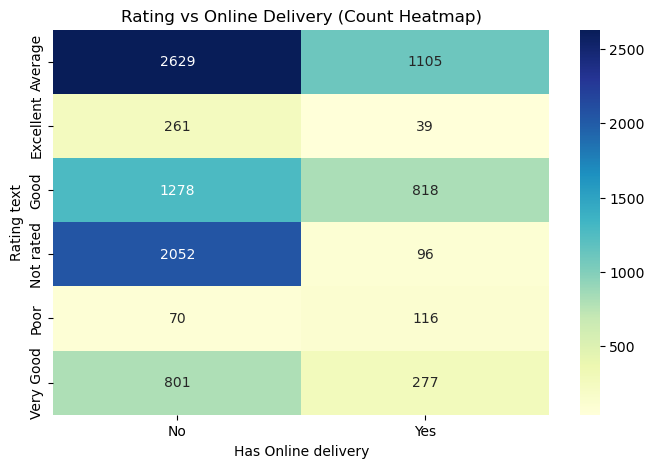

In [190]:
#Creates a heatmap showing the relationship between 'Rating text' and 'Has Online delivery', with the counts represented in the cells.

cross_tab = pd.crosstab(df['Rating text'], df['Has Online delivery'])

plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Rating vs Online Delivery (Count Heatmap)")
plt.show()


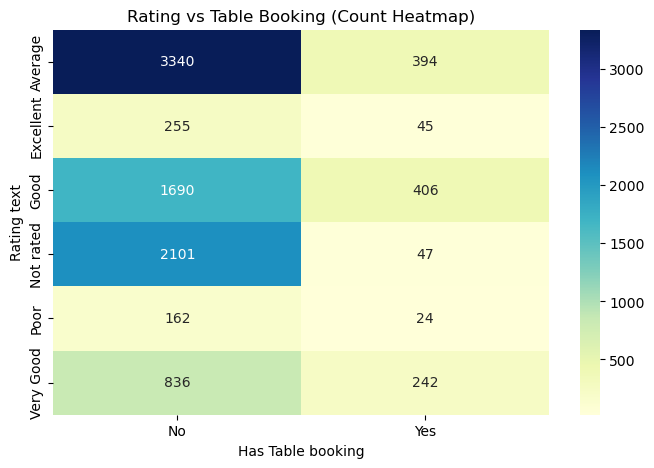

In [192]:
#Creates a heatmap showing the relationship between 'Rating text' and 'Has Table Booking', with the counts represented in the cells.

cross_tab = pd.crosstab(df['Rating text'], df['Has Table booking'])

plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Rating vs Table Booking (Count Heatmap)")
plt.show()

DIAGNOSIS

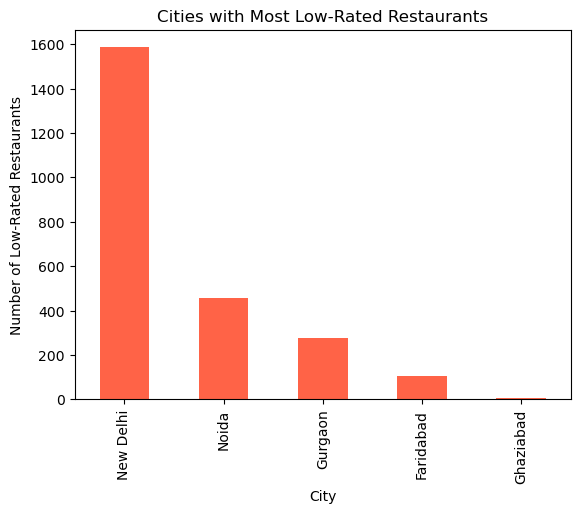

In [195]:
# Define low-rated restaurants (e.g., rating <= 2.5)
low_rated = df[df['Aggregate rating'] <= 2.5]

# Group by City and count low-rated restaurants
low_rating_city = low_rated.groupby('City').size().sort_values(ascending=False).head(5)

# Plot
low_rating_city.plot(kind='bar', color='tomato')
plt.title("Cities with Most Low-Rated Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Low-Rated Restaurants")
plt.show()


<Axes: title={'center': 'Common Cuisines in Low-Rated Restaurants'}, ylabel='Cuisines'>

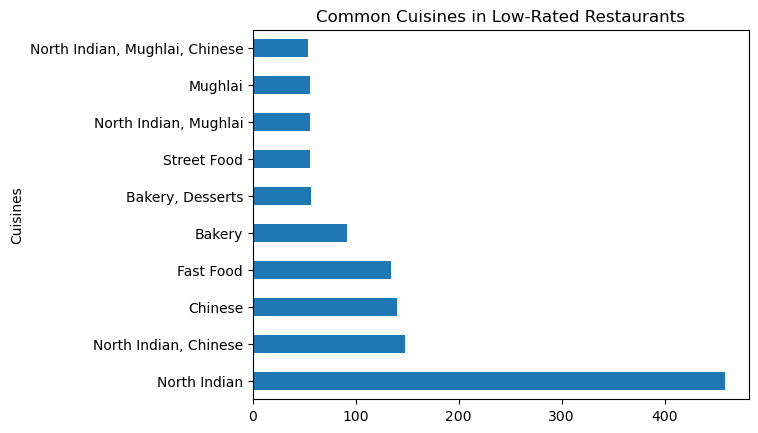

In [197]:
#Here we look for patterns that might be causing low ratings.

# Cuisine types in low-rated restaurants
low_cuisine_counts = low_rated['Cuisines'].value_counts().head(10)
low_cuisine_counts.plot(kind='barh', title='Common Cuisines in Low-Rated Restaurants')


In [199]:
# The most voted restaurant

df.iloc[[728]][['Restaurant Name' , 'City', 'Cuisines' , 'Average Cost for two' , 'Currency' , 'Price range' , 'Aggregate rating' , 'Votes']]

,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Votes
728,Eat Street,Bangalore,"North Indian, Chinese, Italian, Street Food, D...",400,Indian Rupees(Rs.),1,4.3,753


In [201]:
#Exclude zero-cost rows for min calculation
non_zero_df = df[df["Cost_INR"] > 0]

# Find max and min cost in INR
max_row = df.loc[df["Cost_INR"].idxmax()]
min_row = df.loc[df["Cost_INR"].idxmin()]

# Print only the INR values
print(f"Max average cost for two persons (in INR): {max_row['Cost_INR']:,.0f}")
print(f"Min average cost for two persons (in INR): {min_row['Cost_INR']:,.0f}")

Max average cost for two persons (in INR): 41,500
Min average cost for two persons (in INR): 0


In [203]:
#Let's be realistic minimum cost for two persons cannot be zero. So, will filter out the 0's and take the least cost for two persons

# Step 1: Ensure Cost_INR is numeric and not null
df['Cost_INR'] = pd.to_numeric(df['Cost_INR'], errors='coerce')

# Step 2: Filter out NaN and true 0 values
non_zero_df = df[(df['Cost_INR'].notnull()) & (df['Cost_INR'] > 1e-2)]  # Exclude near-zero too

# Step 3: Get the max and corrected min
max_row = df.loc[df['Cost_INR'].idxmax()]
min_row = non_zero_df.loc[non_zero_df['Cost_INR'].idxmin()]

# Step 4: Print the results
print(f"Max average cost for two persons (in INR): {max_row['Cost_INR']:,.0f}")
print(f"Min average cost for two persons (in INR) (excluding 0): {min_row['Cost_INR']:,.0f}")


Max average cost for two persons (in INR): 41,500
Min average cost for two persons (in INR) (excluding 0): 50


In [205]:
#Total number of restaurants that do not have any ratings

zero_rating_count = df[df['Aggregate rating'] == 0].shape[0]
print(f"Total number of restaurants that do not have any ratings: {zero_rating_count}")

Total number of restaurants that do not have any ratings: 2148



INFERENCE

1. Most restaurants fall in the mid-rating range (3.0–4.0), indicating generally satisfactory but not exceptional experiences. Ratings cluster around "Good" and "Very Good".

2. Majority of restaurants are priced in the lower to mid-range (1–2), with fewer premium options. Metro cities like New Delhi, Jakarta, and Colombo dominate the high-cost segment.

3. Customer votes are right-skewed, with a few restaurants receiving very high engagement, often mid-to-high cost venues perceived as good value.

4. Online delivery is not widely available, revealing a potential service gap. Those offering it tend to have slightly lower ratings.

5. Table booking is linked to higher ratings, likely reflecting better dining experiences and service structure.

6. Cost does not strongly correlate with ratings, but there's a modest positive correlation between votes and ratings—popular spots tend to be well-rated.

7. Top 1% high-cost restaurants are likely luxury or fine-dining, concentrated in affluent or tourist-heavy cities. Cost and vote outliers may signal standout success or inefficiencies.

8. Top cuisines include North Indian, Chinese, and Fast Food, showing broad popularity. Low-rated places often serve niche or region-specific cuisines.

9. Tier 2 cities show more low-rated restaurants, possibly due to fewer options or lower standards.

10. The highest average cost for two can reach around 40,000 INR in luxury settings, while the lowest is under 100 INR at budget eateries.




What the Data Tells Us? — Summary for Restaurant Managers

1. Most places sit around the 3.0–4.0 rating mark.
That’s okay, but not great. Small improvements in service or atmosphere could really push ratings up and help stand out in a crowded space.

2. Lower to mid-priced restaurants are the norm.
Most diners are sticking to affordable options. Unless you're in a premium area like Delhi or Jakarta, it makes sense to stay competitively priced.

3. A few restaurants get most of the votes.
There’s a big gap in visibility. If you're not getting engagement, it might be time to ramp up your online presence — reviews, marketing, maybe even collabs with food bloggers.

4. Table booking seems to be linked with higher ratings.
That tells us structured service matters. If you don’t have booking yet, it could be worth trying out — even a simple system could help.

On the flip side, places doing online delivery tend to get slightly lower ratings. Could be due to poor packaging or delays — something to keep an eye on if you offer delivery.

5. Popular cuisines are no surprise: North Indian, Chinese, and Fast Food.
If you're trying something super niche, make sure there’s demand. Otherwise, stick with what people love.

6. Tier2 cities have more low-rated places.
That might seem bad, but it’s actually a good opportunity. Better-managed chains could really thrive there by filling the quality gap.

7. The high-cost, luxury segment is tiny and risky.
Unless you’re targeting a wealthy crowd in a top city, it’s probably better to focus on affordability and value.

8. Lastly, pay attention to the outliers.
Some places charge crazy high prices or get tons of votes - those are worth studying. Are they doing something different that works?
